<a href="https://colab.research.google.com/github/karti358/image_captioning/blob/main/notebooks/captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets:

1. [IAPR TC-12](http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz)

2. [Flickr8K](https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip)

3. [Flickr30](https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset)

4. [MS COCO](https://cocodataset.org/#download)

In [1]:
!wget http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz
!tar -xvf iaprtc12.tgz

Streaming output truncated to the last 5000 lines.
iaprtc12/images/32/32281.jpg
iaprtc12/images/32/32282.jpg
iaprtc12/images/32/32283.jpg
iaprtc12/images/32/32284.jpg
iaprtc12/images/32/32285.jpg
iaprtc12/images/32/32286.jpg
iaprtc12/images/32/32287.jpg
iaprtc12/images/32/32288.jpg
iaprtc12/images/32/32289.jpg
iaprtc12/images/32/32290.jpg
iaprtc12/images/32/32291.jpg
iaprtc12/images/32/32292.jpg
iaprtc12/images/32/32293.jpg
iaprtc12/images/32/32294.jpg
iaprtc12/images/32/32295.jpg
iaprtc12/images/32/32296.jpg
iaprtc12/images/32/32297.jpg
iaprtc12/images/32/32298.jpg
iaprtc12/images/32/32299.jpg
iaprtc12/images/32/32300.jpg
iaprtc12/images/32/32301.jpg
iaprtc12/images/32/32302.jpg
iaprtc12/images/32/32303.jpg
iaprtc12/images/32/32304.jpg
iaprtc12/images/32/32305.jpg
iaprtc12/images/32/32306.jpg
iaprtc12/images/32/32307.jpg
iaprtc12/images/32/32308.jpg
iaprtc12/images/32/32309.jpg
iaprtc12/images/32/32310.jpg
iaprtc12/images/32/32311.jpg
iaprtc12/images/32/32312.jpg
iaprtc12/images/32/32

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import torch
# !pip install pytorch_lightning
import pytorch_lightning as pl
import math
from transformers import AutoTokenizer
from torchvision import transforms

In [2]:
def extract_description(xml_file):
    # Parse the XML file
    try:
      tree = ET.parse(xml_file)
    except Exception as e:
      print(f"error in parsing tree - {xml_file}", e)
      return None

    root = tree.getroot()

    # Iterate through each <DESCRIPTION> tag
    description = root.find('DESCRIPTION')
    return description

data = []

main_dir = os.getcwd()
for dir in sorted(os.listdir(os.path.join(main_dir, "iaprtc12/images"))):
  for f in sorted(os.listdir(os.path.join(main_dir, "iaprtc12/images/" + dir))):

    image_path = os.path.join(main_dir, "iaprtc12/images/" + dir + "/" + f)
    annot_path = os.path.join(main_dir, "iaprtc12/annotations_complete_eng/" + dir + "/" + f.split(".")[0] + ".eng")
    ele = extract_description(annot_path)

    if ele is None:
      continue

    data.append((
        image_path,
        ele.text
    ))
print(len(data))

error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/33.eng not well-formed (invalid token): line 6, column 21
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/35.eng not well-formed (invalid token): line 5, column 47
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/40.eng not well-formed (invalid token): line 6, column 21
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/42.eng not well-formed (invalid token): line 5, column 149
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/45.eng not well-formed (invalid token): line 5, column 143
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/47.eng not well-formed (invalid token): line 5, column 109
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/48.eng not well-formed (invalid token): line 3, column 27
error in parsing tree - /content/iaprtc12/annotations_complete_eng/00/51.eng not well-formed (invalid

In [4]:
maxi = len(max(data, key = lambda x: len(x[1]))[1])
maxi

420

a dark-skinned, dark-haired girl wearing a USA pullover and red pants is standing outside; a wall made of boulders in the near background; USA jumper says "Future USA" at the front, with the Olympic rings below the letters, one sleeve shows the stars, the other one the stripes;


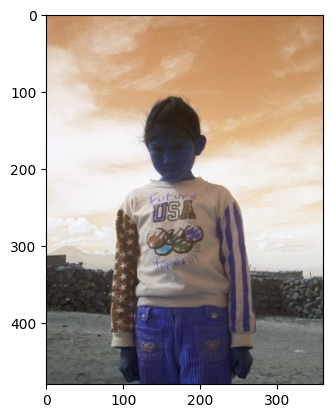

In [6]:
img_path, text = data[100]
img = cv2.imread(img_path)
plt.imshow(img)
print(text)

In [7]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
for val in tokenizer.special_tokens_map.values():
  print(val, tokenizer.vocab[val])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<|endoftext|> 50256
<|endoftext|> 50256
<|endoftext|> 50256


In [8]:
tokenizer.add_special_tokens({"bos_token": "<|begoftext|>", "unk_token" : "<|unknown|>", "pad_token" : "<|padding|>"})
for val in tokenizer.special_tokens_map.values():
  print(val, tokenizer.vocab[val])

ids = tokenizer("<|unknown|> <|begoftext|> I am done. <|padding|> <|endoftext|>", return_tensors = "pt", ).input_ids

print(ids.squeeze(), ids.dtype)

<|begoftext|> 50257
<|endoftext|> 50256
<|unknown|> 50258
<|padding|> 50259
tensor([50258,   220, 50257,   314,   716,  1760,    13,   220, 50259,   220,
        50256]) torch.int64


tensor([50257,    64,  3223,    12, 41412,    11,  3223,    12, 29972,  2576,
          318,  5586,   379,   257,  6915,   290,  5762,   257,  2330,  2834,
         2502,   351,   281, 32094,    26,   220, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259,
        50259, 50259, 50259, 50259, 50259, 50259, 50259, 50259, 

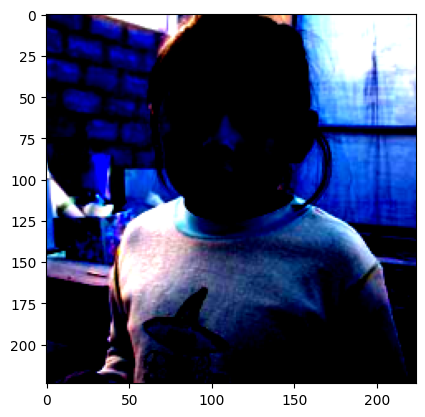

In [9]:
class CaptionDataset(torch.utils.data.Dataset):
  def __init__(self, links_array, tokenizer):
    super().__init__()
    self.links_array = links_array
    self.preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
                                         )

  def __len__(self, ):
    return len(self.links_array)

  def __getitem__(self, idx):
    img_path, annot = self.links_array[idx]

    img = torch.tensor(cv2.imread(img_path) / 255.0, dtype = torch.float32).permute(2, 0, 1)
    img = self.preprocess(img)

    # img = img.astype(np.float64)
    # img = torch.tensor(img, dtype = torch.float64)

    annot_in = "<|begoftext|>" + annot
    annot_out = annot + "<|endoftext|>"

    ids_in = tokenizer(annot_in, return_tensors = "pt").input_ids.squeeze()
    ids_out = tokenizer(annot_out, return_tensors = "pt").input_ids.squeeze()

    if ids_in.shape[0] < 512:
      ids_in = torch.cat([ ids_in, torch.full((512 - ids_in.shape[0], ), fill_value = 50259, dtype = torch.int64)], axis = 0)
      ids_out = torch.cat([ ids_out, torch.full((512 - ids_out.shape[0], ), fill_value = 50259, dtype = torch.int64)], axis = 0)

    ids_out = torch.nn.functional.one_hot(ids_out, num_classes = 50260)

    return (img, ids_in), ids_out
sample_dataset = CaptionDataset(data, tokenizer)
(img, ids_in), ids_out = sample_dataset[95]
plt.imshow(img.permute(1,2, 0))


print(ids_in, ids_in.shape)
print(ids_out, ids_out.shape)

In [10]:
total = len(data)
test_size = math.floor(0.15 * total)

train_arr = data[:len(data) - 2 * test_size]
val_arr = data[len(data) - 2 * test_size:len(data) - test_size]
test_arr = data[len(data) - test_size:]

print(len(train_arr), len(val_arr), len(test_arr))

12311 2638 2638


In [11]:
train_dataset = CaptionDataset(train_arr, tokenizer)
val_dataset = CaptionDataset(val_arr, tokenizer)
test_dataset = CaptionDataset(test_arr, tokenizer)

In [12]:
class m_RNN(pl.LightningModule):
  def __init__(self, m_size, w_size, r_size, i_size):
    super().__init__()

    self.linear_rnn = torch.nn.Linear(
        in_features = r_size,
        out_features = w_size,
        bias = False
    )

    self.relu = torch.nn.ReLU()

    self.linear_w = torch.nn.Linear(
        in_features = w_size,
        out_features = m_size,
        bias = False
    )

    self.linear_r = torch.nn.Linear(
        in_features = r_size,
        out_features = m_size,
        bias = False
    )

    self.linear_i = torch.nn.Linear(
        in_features = i_size,
        out_features = m_size,
        bias = False
    )

    self.tanh = torch.nn.Tanh()

    self.softmax = torch.nn.Softmax(dim = 2)

  def forward(self, ws, r, i):
    ret_probs = []
    samples = ws.shape[1]
    for i in range(samples):
      r = self.relu(self.linear_rnn(r), + ws[:, i:i+1, :])

      m = 1.7159 * self.tanh(self.linear_w(ws[:, i:i+1, :]) + self.linear_r(r) + self.linear_i(i))

      ret_probs.append(self.softmax(m))

    return torch.cat(ret_probs, dim = 1)






class MultiModalCaptioning(pl.LightningModule):
    def __init__(self, m_size, hidden_w_size, w_size, r_size, i_size, num_classes,
                 tokenizer, test_dataset, train_dataset=None, val_dataset=None,
                 learning_rate=0.0001, batch_size=16, vocab_size=50260):
        super().__init__()
        self.m_size = m_size
        self.hidden_w_size = hidden_w_size
        self.w_size = w_size
        self.r_size = r_size
        self.i_size = i_size

        self.tokenizer = tokenizer

        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.vocab_size = vocab_size

        #------------Image Model----------------------
        temp_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True, )
        self.image_model = torch.nn.Sequential(
            temp_model.features,
            temp_model.avgpool,
            temp_model.classifier[:5]
        )

        #-------------Embedding-----------------------
        self.embedding = torch.nn.Sequential(
            torch.nn.Embedding(
                self.vocab_size,
                self.hidden_w_size,
                padding_idx = self.tokenizer.vocab["<|padding|>"]
            ),
            torch.nn.Linear(
                in_features = self.hidden_w_size,
                out_features = self.w_size,
                bias = False
            )
        )

        self.rnn = m_RNN(self.m_size, self.w_size, self.r_size, self.i_size)

    def forward(self, images, ids_in):
      i = self.image_model(images)
      i = torch.unsqueeze(i, 1)

      ws = self.embeddding(ids_in)

      r_init = torch.full( (ws.shape[0], 1, self.r_size), fill_value = 50259, dtype = torch.int64)

      probs = self.rnn(ws, r_init, i)

      return probs

    def training_step(self, batch, batch_idx):
        (imgs, ids_in), ids_out = batch

        # Forward pass
        outputs = self(imgs, ids_in)
        loss = torch.nn.functional.cross_entropy(outputs, ids_out)

        tensorboard_logs = {'train_loss': loss}
        # use key 'log'
        return {"loss": loss, 'log': tensorboard_logs}

    # define what happens for testing here

    def train_dataloader(self):
        # Data loader
        train_loader = torch.utils.data.DataLoader(
            dataset=self.train_dataset, batch_size=self.batch_size, shuffle=False
        )
        return train_loader

    def val_dataloader(self):
        val_loader = torch.utils.data.DataLoader(
            dataset=self.val_dataset, batch_size=self.batch_size, shuffle=False
        )
        return val_loader

    def validation_step(self, batch, batch_idx):
        (imgs, ids_in), ids_out = batch

        # Forward pass
        outputs = self(imgs, ids_in)

        loss = torch.nn.functional.cross_entropy(outputs, ids_out)

        tensorboard_logs = {'val_loss': loss}
        # use key 'log'
        return {"val_loss": loss, 'log': tensorboard_logs}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [14]:
model = MultiModalCaptioning(
    512,
    128,
    256,
    256,
    4096,
    50260,
    tokenizer,
    test_dataset = test_dataset,
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    learning_rate=0.0001,
    batch_size=16,
    vocab_size=50260
    ).to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
trainer = pl.Trainer(max_epochs = 2)
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name        | Type       | Params
-------------------------------------------
0 | image_model | Sequential | 57.0 M
1 | embedding   | Sequential | 6.5 M 
2 | rnn         | m_RNN      | 2.4 M 
-------------------------------------------
65.9 M    Trainable params
0         Non-trainable params
65.9 M    Total params
263.579   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 shapes cannot be multiplied (24576x6 and 9216x4096)

In [19]:
+temp_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [22]:
temp_model(img[None, ...].permute(0, 3, 1, 2)).shape

torch.Size([1, 1000])

In [ ]:
for i, batch in enumerate(model.train_dataloader()):
  assert list(batch[0][0].shape) == [16, 3, 224 ,224]
  print(batch[0][0].shape, batch[0][1].shape, batch[1].shape)